In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import custom modules
import sys
sys.path.append('../src')  

from data.clean_data import load_and_clean_data
from visualization.plot_utils import *

In [2]:
# Use our function to load and clean the data in one step!
df, config = load_and_clean_data()

# The function already prints all the info, but let's keep a clean copy
print("\nData is now loaded and cleaned. Ready for analysis!")

Dataset loaded successfully.
Initial shape: (100000, 19)
Data path: ../data/raw/dielectron.csv

Checking for missing values:
Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64

Dropped 85 rows with missing values.
New shape: (99915, 19)

Number of duplicate rows: 23

Keeping 19 specified columns
Final shape: (99915, 19)

Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 99915 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     99915 non-null  int64  
 1   Event   99915 non-null  int64  
 2   E1      99915 non-null  float64
 3   px1     99915 non-null  float64
 4   py1     99915 non-null  float64
 5   pz1     99915 non-null  float64
 6   pt1     99915 non-null  float64
 7   eta1    99915 non-null 

In [3]:
# Set consistent plot style for all visualizations
set_plot_style()

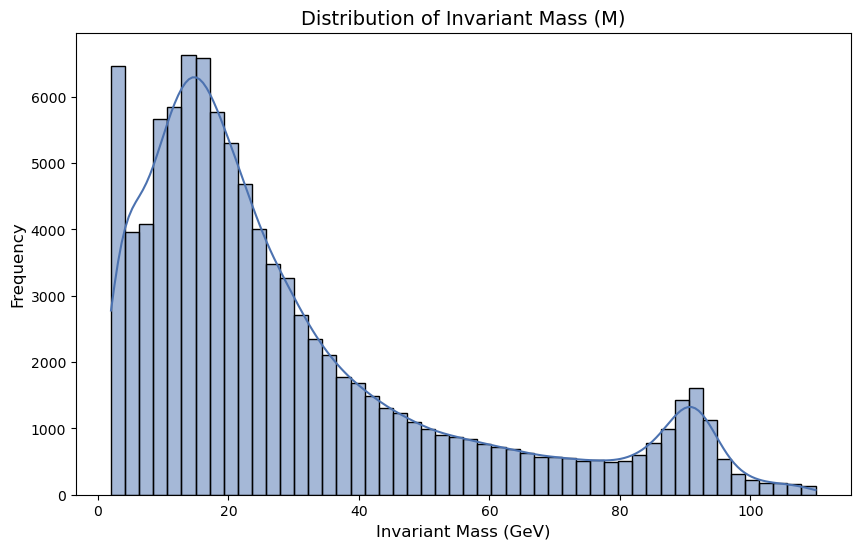

In [4]:
# Create histogram using my function
plot_histogram(df, 'M', bins=50, 
               xlabel='Invariant Mass (GeV)', 
               title='Distribution of Invariant Mass (M)',
               kde=True)

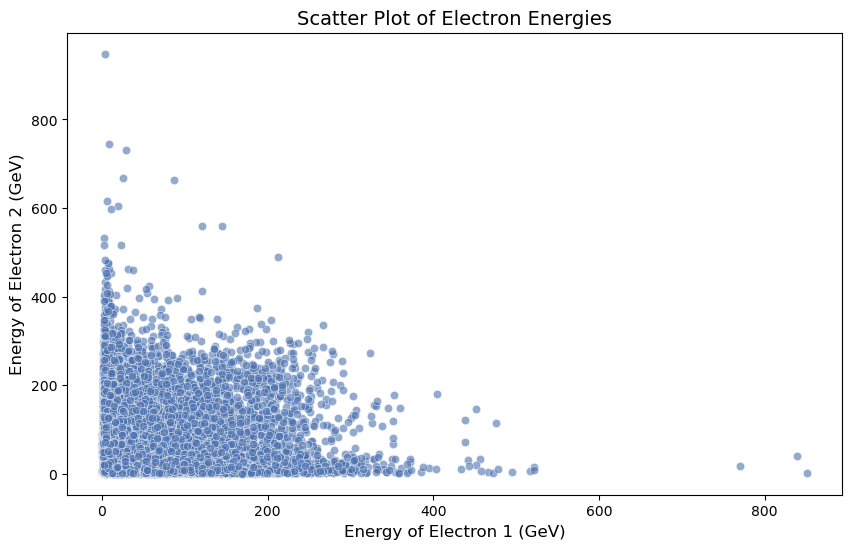

In [5]:
# Create scatter plot using my function
plot_scatter(df, 'E1', 'E2',
             xlabel='Energy of Electron 1 (GeV)',
             ylabel='Energy of Electron 2 (GeV)',
             title='Scatter Plot of Electron Energies',
             alpha=0.6)

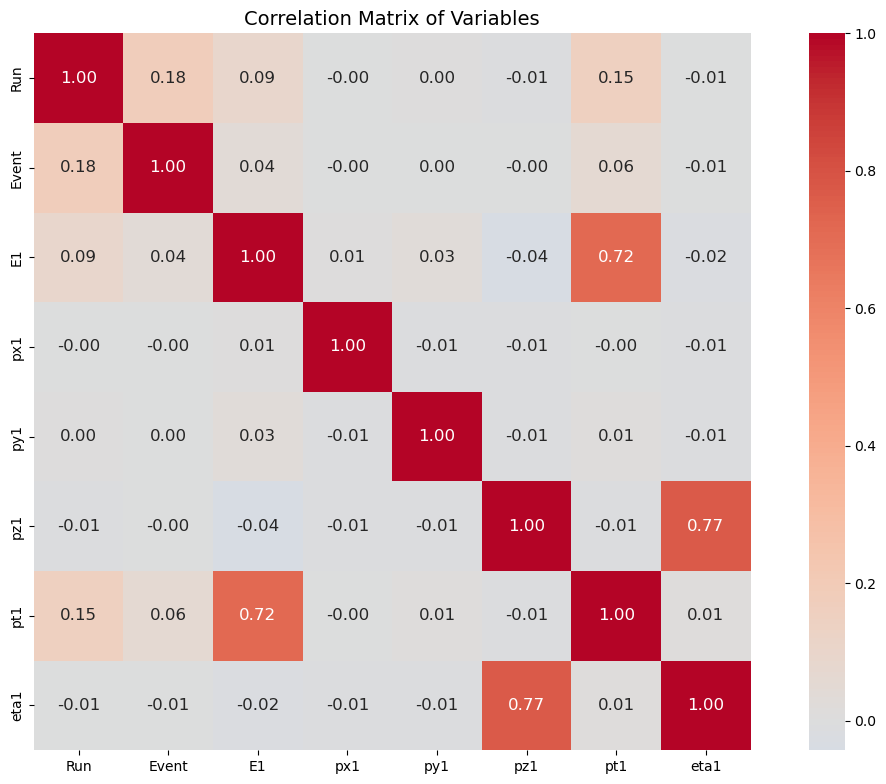

In [6]:
# Create correlation matrix heatmap
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
plot_correlation_matrix(df, columns=numeric_columns[:8],  # Limit to first 8 columns for readability
                       title='Correlation Matrix of Variables')

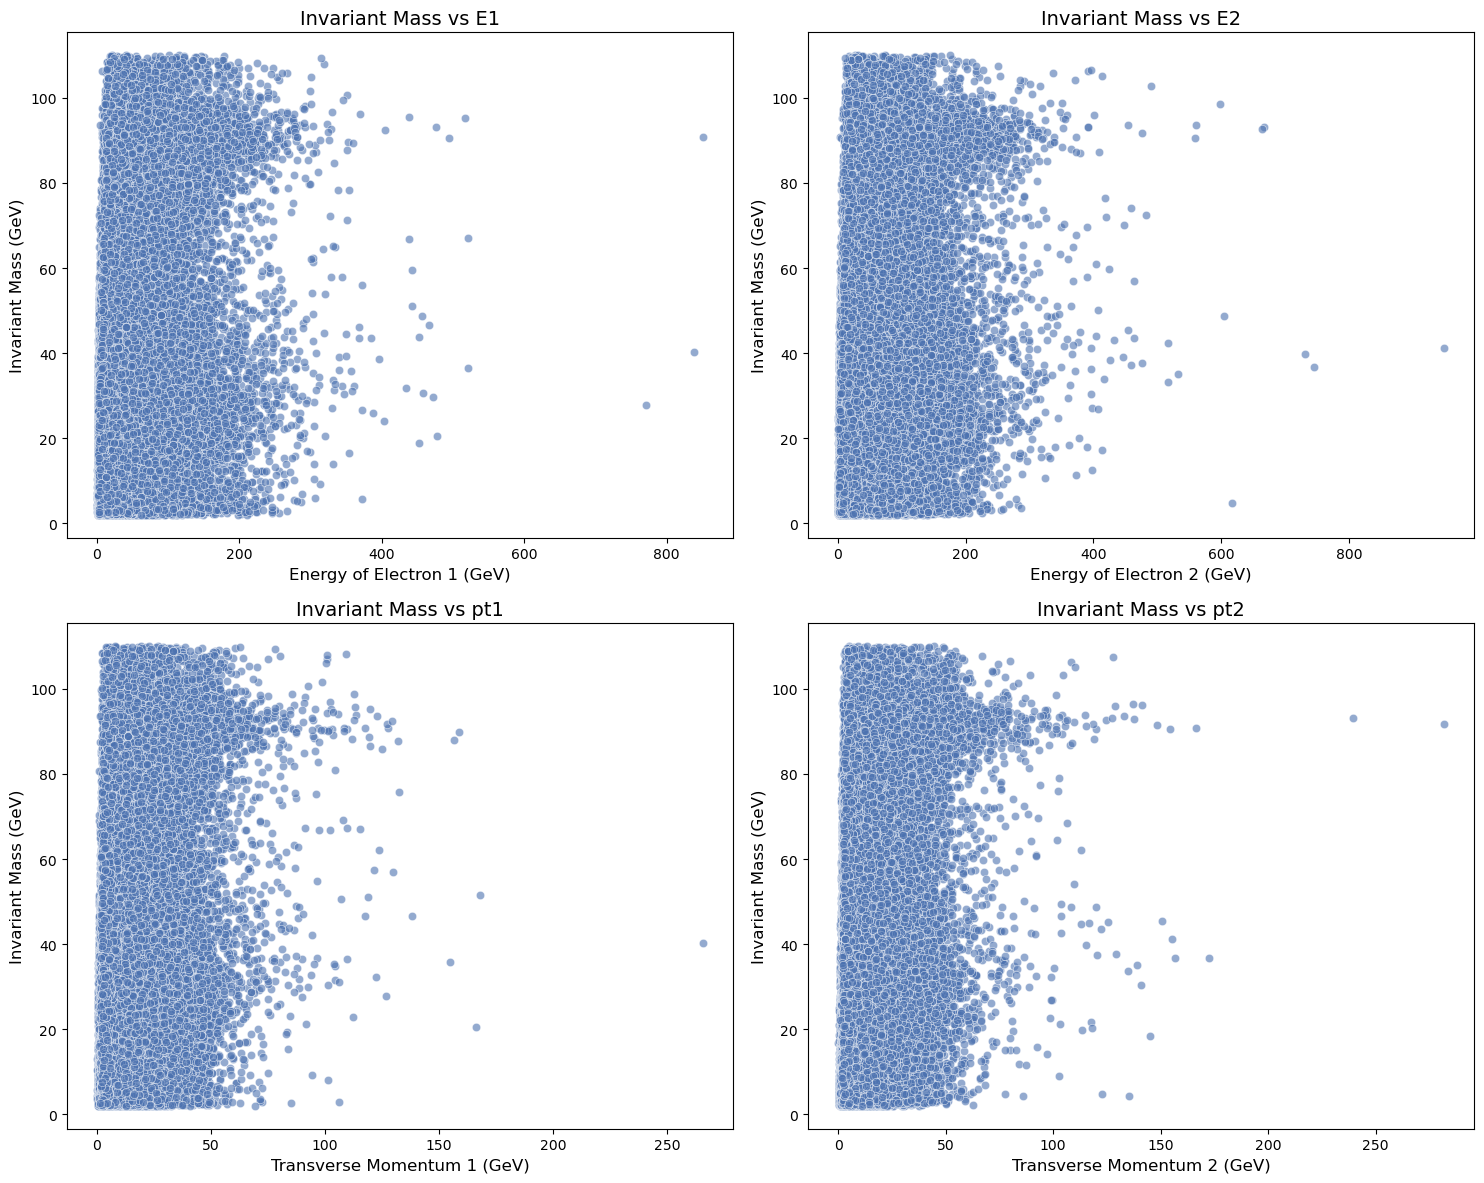

In [7]:
# Instead of full pairplot I focus on specific interesting relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

plot_scatter(df, 'E1', 'M', 
             xlabel='Energy of Electron 1 (GeV)',
             ylabel='Invariant Mass (GeV)',
             title='Invariant Mass vs E1',
             ax=axes[0, 0])

plot_scatter(df, 'E2', 'M', 
             xlabel='Energy of Electron 2 (GeV)',
             ylabel='Invariant Mass (GeV)',
             title='Invariant Mass vs E2',
             ax=axes[0, 1])

plot_scatter(df, 'pt1', 'M', 
             xlabel='Transverse Momentum 1 (GeV)',
             ylabel='Invariant Mass (GeV)',
             title='Invariant Mass vs pt1',
             ax=axes[1, 0])

plot_scatter(df, 'pt2', 'M', 
             xlabel='Transverse Momentum 2 (GeV)',
             ylabel='Invariant Mass (GeV)',
             title='Invariant Mass vs pt2',
             ax=axes[1, 1])

plt.tight_layout()
plt.show()

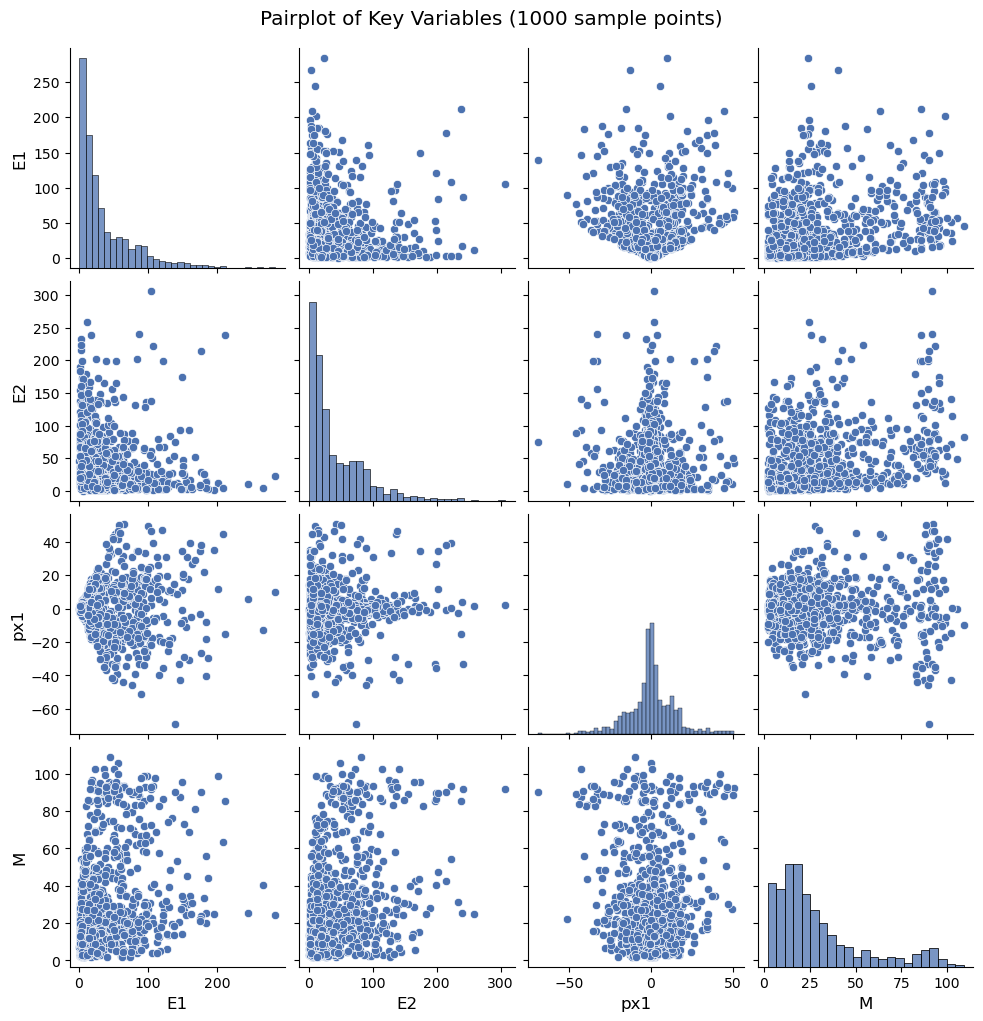

In [8]:
# Create a pairplot with a sample of 1000 points for faster rendering
sample_df = df.sample(n=1000, random_state=42)  

plot_pairplot(sample_df, 
              columns=['E1', 'E2', 'px1', 'M'],
              title='Pairplot of Key Variables (1000 sample points)')

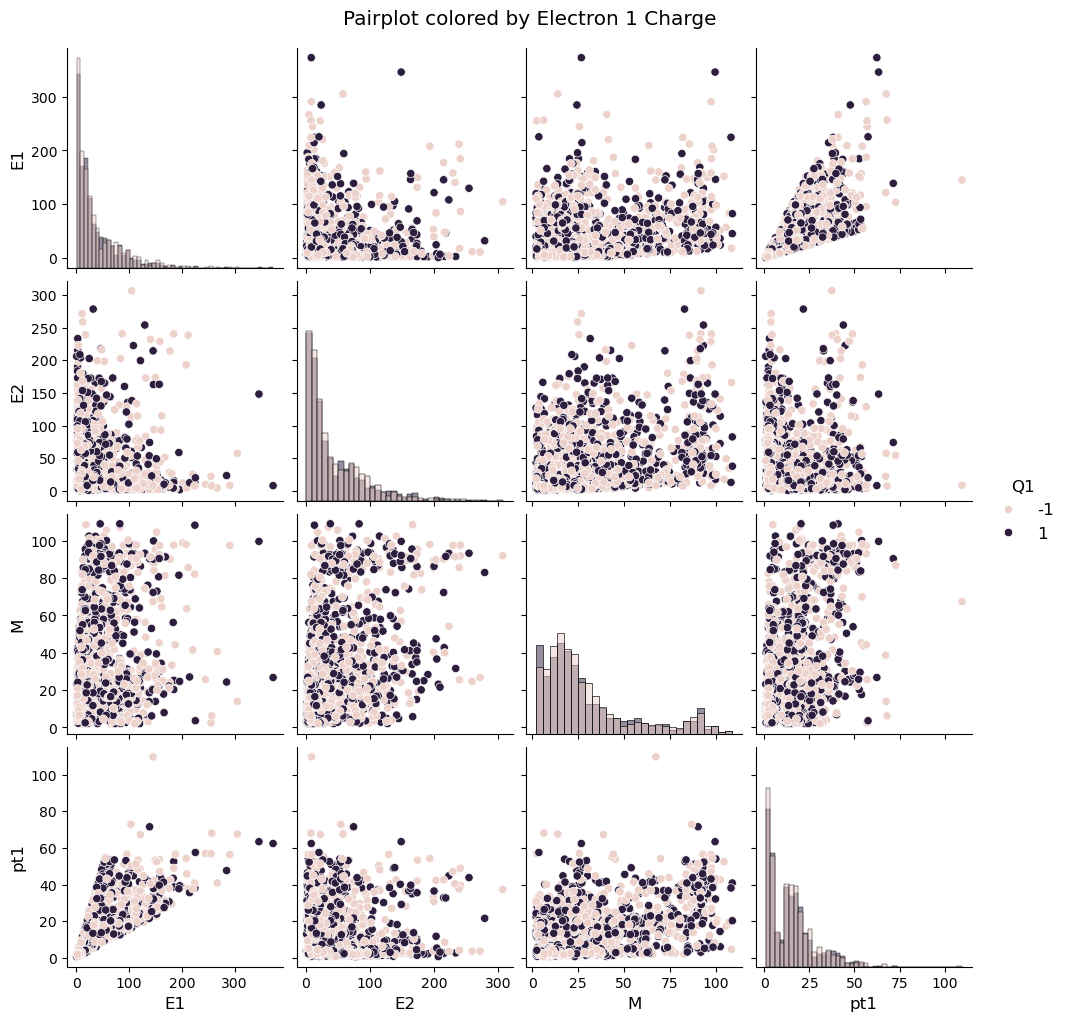

In [9]:
# pairplot with Q1 as hue
plot_pairplot(df, 
              columns=['E1', 'E2', 'M', 'pt1'],
              hue='Q1',  # Q1 is categorical but will be included correctly
              title='Pairplot colored by Electron 1 Charge',
              sample_size=2000)  # Optional sampling for performance

In [10]:
# Verify analysis parameters
print("=== ANALYSIS PARAMETER VERIFICATION ===")
print(f"Invariant Mass range: {df['M'].min():.1f} to {df['M'].max():.1f} GeV")
print(f"E1 range: {df['E1'].min():.1f} to {df['E1'].max():.1f} GeV") 
print(f"E2 range: {df['E2'].min():.1f} to {df['E2'].max():.1f} GeV")

# Check if 50 bins is appropriate
import numpy as np
n_bins = int(1 + 3.322 * np.log(len(df)))  # Sturges' formula
print(f"Recommended bins (Sturges): {n_bins}")

=== ANALYSIS PARAMETER VERIFICATION ===
Invariant Mass range: 2.0 to 110.0 GeV
E1 range: 0.4 to 850.6 GeV
E2 range: 0.5 to 948.4 GeV
Recommended bins (Sturges): 39


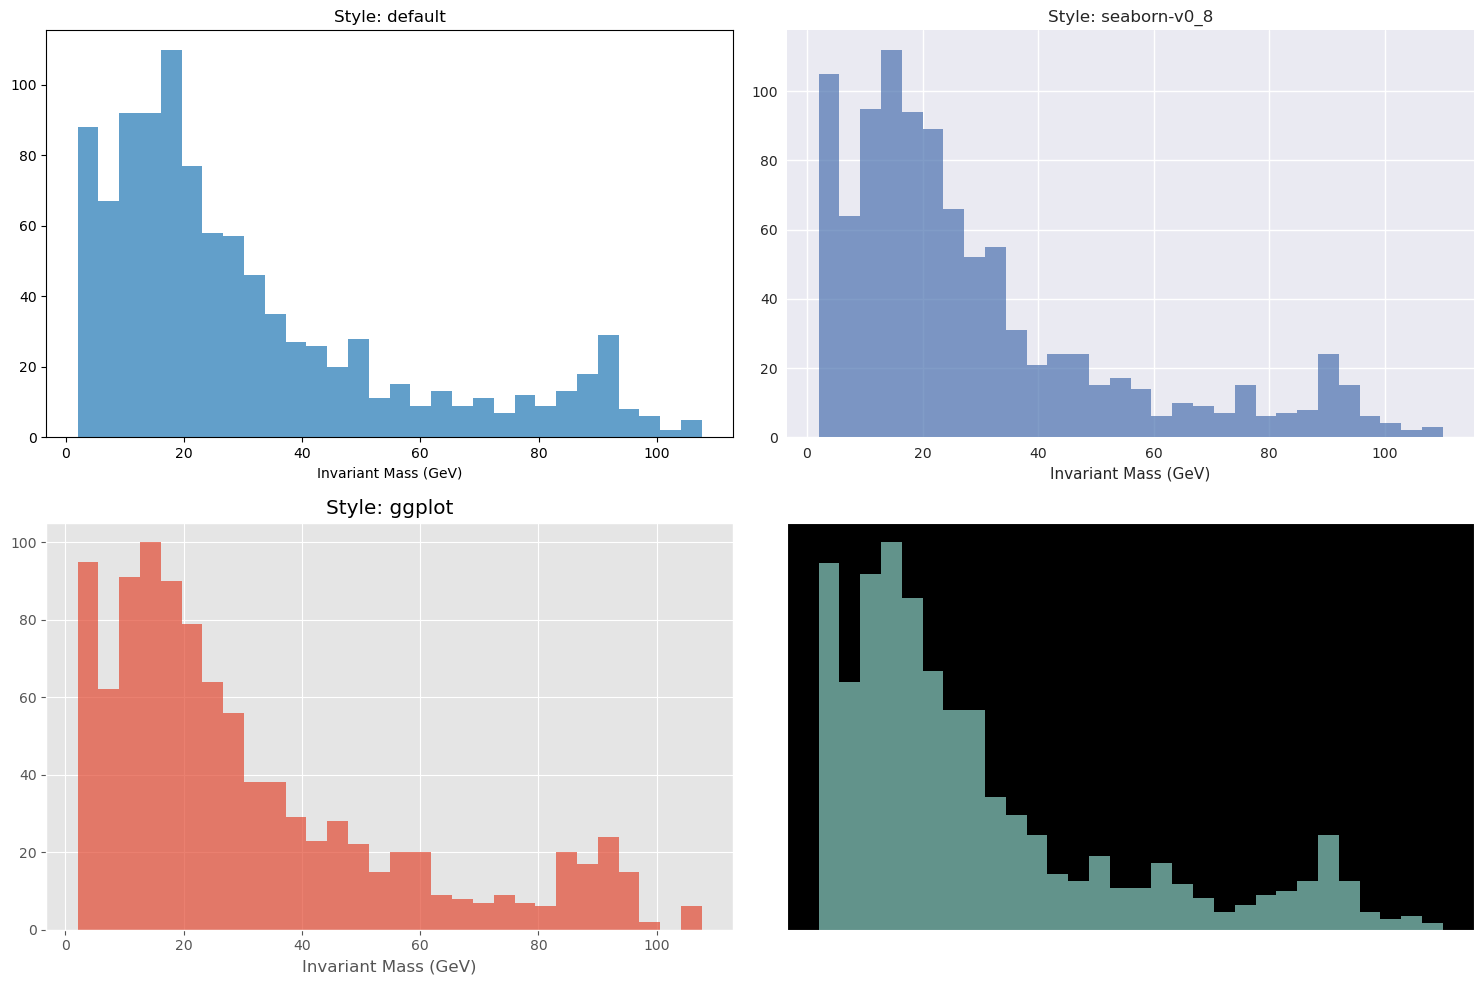

In [11]:
# Test different visualization settings
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np  # Added for demonstration if df is not defined

# Test different styles with valid matplotlib style names
styles = ['default', 'seaborn-v0_8', 'ggplot', 'dark_background']

# Create a figure with GridSpec
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)

# Loop through styles and create each subplot with its own style
for i, style in enumerate(styles):
    # Create a new subplot
    row, col = i // 2, i % 2
    
    # Create a separate figure with the desired style
    with plt.style.context(style):
        # Create a new subplot in our main figure
        ax = fig.add_subplot(gs[row, col])
        
        # Plot the histogram
        ax.hist(df['M'] if isinstance(df, dict) else df['M'].sample(1000), bins=30, alpha=0.7)
        ax.set_title(f'Style: {style}')
        ax.set_xlabel('Invariant Mass (GeV)')

plt.tight_layout()
plt.show()